## Principal components analysis (PCA)
> The main goal of a PCA analysis is to identify patterns in data. PCA aims to detect the correlation between variables. If a strong correlation between variables exists, the attempt to reduce the dimensionality only makes sense. In a nutshell, this is what PCA is all about: Finding the directions of maximum variance in high-dimensional data and project it onto a smaller dimensional subspace while retaining most of the information.

> Often, the desired goal is to reduce the dimensions of a d-dimensional dataset by projecting it onto a (k)-dimensional subspace (where k<d) in order to increase the computational efficiency while retaining most of the information. 

> Later, we will compute eigenvectors (the principal components) of a dataset and collect them in a projection matrix. Each of those eigenvectors is associated with an eigenvalue which can be interpreted as the "length" or "magnitude" of the corresponding eigenvector. If some eigenvalues have a significantly larger magnitude than others that the reduction of the dataset via PCA onto a smaller dimensional subspace by dropping the "less informative" eigenpairs is reasonable.

### A Summary of the PCA Approach
- Standardize the data.
- Obtain the Eigenvectors and Eigenvalues from the covariance matrix or correlation matrix, or perform Singular Vector Decomposition.
- Sort eigenvalues in descending order and choose the k eigenvectors that correspond to the k largest eigenvalues where k is the number of dimensions of the new feature subspace (k ≤ d).
- Construct the projection matrix **W** from the selected k eigenvectors.
- Transform the original dataset **X** via **W** to obtain a k-dimensional feature subspace **Y**.

### Suggested reading: [線代啟示錄 - PCA](https://ccjou.wordpress.com/2013/04/15/%E4%B8%BB%E6%88%90%E5%88%86%E5%88%86%E6%9E%90/)

In [25]:
from sklearn.datasets import load_iris
from sklearn import preprocessing
from sklearn.decomposition import PCA

iris = load_iris()
X, y = iris.data, iris.target
scaler = preprocessing.StandardScaler()
scaler = scaler.fit(X)
X = scaler.transform(X)
print(X.shape)

pca = PCA(n_components=2)
pca.fit(X)
new_X = pca.transform(X)
print(new_X.shape)

(150, 4)
(150, 2)


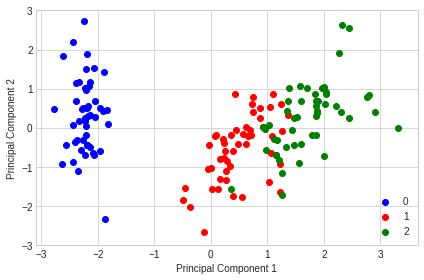

In [26]:
import matplotlib.pyplot as plt

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip((0, 1, 2),
                        ('blue', 'red', 'green')):
        plt.scatter(new_X[y==lab, 0],
                    new_X[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()